In [1]:
from dataset.random_circuit import random_circuit
from pattern_extractor.randomwalk_model import RandomwalkModel, add_pattern_error
from dataset.dataset_loader import load_algorithms, load_randomcircuits
from analysis.cricuit_operation import assign_barrier, dynamic_decoupling
from simulator.hardware_info import max_qubit_num
import pickle
import random

In [2]:
path = 'rwm_5qubit.pkl'

In [3]:
# dataset = []
# for n_gates in range(10, 50, 10):
#     for prob in range(3, 8):
#         prob = prob * 0.1
#         # dataset += load_randomcircuits(n_qubits = max_qubit_num, n_gates = 20, two_qubit_prob = prob, n_circuits = 2000)
#         dataset += load_randomcircuits(n_qubits = max_qubit_num, n_gates = n_gates, two_qubit_prob = prob, n_circuits = 100)
# return dataset
# model = RandomwalkModel(1, 20)  #max-step=2 会有14000维，max-step 也有10000维，减少生成的特征的数量``
# # # 还是需要降维的比如基于一些相似性啥的
# model.train(dataset)
# model.save(path)

In [3]:
model = RandomwalkModel.load(path)

In [5]:
# model.load_reduced_vecs()
# model.save(path)

0 0.005315514


In [ ]:
all_paths = list(model.hash_table.keys())
random.shuffle(all_paths)
[_path for _path in all_paths if len(_path) > 11][:100]
# len("loop-cx-4-3")

['loop-ry-3,dependency-rz-3',
 'loop-ry-3,parallel-rx-0',
 'loop-rz-4,parallel-rz-3',
 'loop-cx-2-1,parallel-rx-4',
 'loop-ry-3,dependency-cx-1-2',
 'loop-ry-4,dependency-rx-4',
 'loop-rx-4,dependency-rz-4',
 'loop-cx-0-1,dependency-cx-1-2',
 'loop-ry-3,parallel-cx-0-1',
 'loop-rz-0,parallel-rz-2',
 'loop-cx-0-1,parallel-cx-3-2',
 'loop-cx-1-0,parallel-cx-4-3',
 'loop-cx-3-4,dependency-rx-0',
 'loop-rz-0,dependency-ry-0',
 'loop-cx-0-1,dependency-rx-2',
 'loop-rx-1,dependency-cx-3-2',
 'loop-rx-1,dependency-rz-4',
 'loop-rz-0,parallel-rx-3',
 'loop-rx-4,dependency-cx-3-2',
 'loop-rz-1,dependency-cx-2-1',
 'loop-cx-2-1,parallel-rz-4',
 'loop-ry-0,dependency-ry-1',
 'loop-ry-4,parallel-rx-3',
 'loop-cx-4-3,parallel-cx-2-1',
 'loop-rz-4,parallel-ry-2',
 'loop-rz-1,dependency-rx-2',
 'loop-rx-1,dependency-cx-3-4',
 'loop-cx-2-3,dependency-rz-3',
 'loop-cx-3-4,dependency-ry-4',
 'loop-cx-2-3,parallel-cx-0-1',
 'loop-cx-0-1,dependency-ry-3',
 'loop-ry-1,dependency-ry-0',
 'loop-cx-3-2,parall

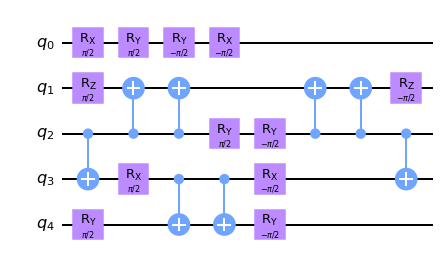

In [ ]:
circuit = random_circuit(max_qubit_num, 20)
circuit.draw('mpl')

In [ ]:
circuit_info = model.vectorize(circuit)
circuit_info['instruction2sparse_vecs']

[[180, 181, 182, 183, 807, 828],
 [52, 80, 82, 219, 238, 808],
 [0, 1, 3, 172, 223, 887],
 [67, 70, 71, 365, 378, 383, 408],
 [9, 10, 12, 26, 263, 272, 495],
 [5, 19, 21, 241, 827, 888],
 [9, 10, 12, 227, 636],
 [34, 286, 287, 520, 630, 643],
 [38, 39, 40, 347, 731, 806],
 [5, 13, 15, 17, 24, 519, 682],
 [5, 13, 16, 17, 78, 411],
 [38, 39, 40, 347, 806],
 [34, 286, 287, 288, 299, 630],
 [9, 10, 12, 26, 227, 645],
 [5, 18, 19, 21, 22, 279],
 [9, 10, 12],
 [67, 70, 71, 366, 378, 721],
 [0, 1, 3, 312, 695, 723],
 [52, 80, 82, 496, 808],
 [180, 181, 182, 807, 847]]

In [ ]:
instruction2sparse_vecs = circuit_info['instruction2sparse_vecs']
for index, instruction in enumerate(circuit_info['instructions']):
    sparse_vec = instruction2sparse_vecs[index]
    print(instruction.operation.name)
    for path_index in sparse_vec:
        print(model.reverse_hash_table[path_index])
        # pass
    print('\n')

cx
loop-cx-2-3
#Q2-3
#Gcx-2-3
loop-cx-2-3,parallel-ry-4
loop-cx-2-3,parallel-rz-1
loop-cx-2-3,parallel-rx-0


rz
#Q1
#Grz-1
loop-rz-1
loop-rz-1,parallel-ry-4
loop-rz-1,parallel-rx-0
loop-rz-1,parallel-cx-2-3


ry
#Q4
#Gry-4
loop-ry-4
loop-ry-4,parallel-cx-2-3
loop-ry-4,parallel-rz-1
loop-ry-4,parallel-rx-0


rx
#Q3
#Grx-3
loop-rx-3
loop-rx-3,dependency-rz-1
loop-rx-3,dependency-rx-0
loop-rx-3,dependency-cx-2-3
loop-rx-3,dependency-ry-4


cx
#Gcx-2-1
loop-cx-2-1
#Q2-1
loop-cx-2-1,dependency-ry-4
loop-cx-2-1,dependency-rx-0
loop-cx-2-1,dependency-cx-2-3
loop-cx-2-1,dependency-rz-1


rx
#Q0
#Grx-0
loop-rx-0
loop-rx-0,parallel-rz-1
loop-rx-0,parallel-cx-2-3
loop-rx-0,parallel-ry-4


cx
#Gcx-2-1
loop-cx-2-1
#Q2-1
loop-cx-2-1,dependency-rx-3
loop-cx-2-1,dependency-ry-0


ry
#Q2
loop-ry-2
#Gry-2
loop-ry-2,dependency-ry-0
loop-ry-2,dependency-cx-3-4
loop-ry-2,dependency-cx-2-1


cx
loop-cx-3-4
#Q3-4
#Gcx-3-4
loop-cx-3-4,dependency-ry-0
loop-cx-3-4,dependency-rx-3
loop-cx-3-4,dependency-cx-2-1


In [ ]:
def parse_path(path):
    steps = path.split(',')
    step = [tuple(step.split('-')) for step in steps]
    return step
# s = "loop-rx-2,parallel-cx-1-0"
# obj = s.split(',')
# parse_path(obj)

In [10]:
from analysis.dimensionality_reduction import MDS, mds_reduce, v_mds_reduce, vvmap_dist, dist
import numpy as np
from jax import grad, jit, vmap, pmap

In [ ]:
vecs = []
sparse_vecs = []
for circuit_info in model.dataset:
    for sparse_vec in circuit_info['instruction2sparse_vecs']:
        # print(sparse_vec)
        sparse_vecs.append(sparse_vec)
        vec = np.zeros((len(model.hash_table), 1))
        for index1 in sparse_vec:
            # print(index1)
            vec[index1][0] = 1
        vecs.append(vec)
vecs = np.array(vecs)
sparse_vecs = np.array(sparse_vecs)
vecs.shape

/var/folders/4h/kdt41ym54rg5__k93lm_0wy80000gn/T/ipykernel_66238/2227523699.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sparse_vecs = np.array(sparse_vecs)


(50000, 897, 1)

In [ ]:
params, reduced_vecs = MDS(vecs, 100, 6, print_interval=1)
params.shape
file = open(path, 'wb')
pickle.dump(params, file)
file.close()

0 0.005647591
1 0.002753518
2 0.0022835927
3 0.0022378482
4 0.00218472
5 0.0021115
6 0.002054832
7 0.0020305556
8 0.0020294785
9 0.0020105625
Finishd at 9 epoch with mean loss 0.0020105624571442604.


In [ ]:
reduced_vecs.shape

NameError: name 'reduced_vecs' is not defined

In [ ]:
mds_path = 'pattern_extractor/model/mds_q5.pkl'
file = open(mds_path, 'rb')
params = pickle.load(file)
file.close()

In [ ]:
vecs = vecs[:1000]
sparse_vecs = sparse_vecs[:1000]
dist_matrix = np.array(vvmap_dist(vecs, vecs))
reduced_vecs = vmap(mds_reduce, in_axes=(None, 0), out_axes=0)(params, vecs)  # 还是会超出内存
reduced_dist_matrix = np.array(vvmap_dist(reduced_vecs, reduced_vecs))

In [ ]:
# np.argsort(reduced_dist_matrix[0][1:])
# np.argsort(dist_matrix[0][1:])
reduced_dist_matrix

array([[   0.    , 3609.4998, 3832.3171, ..., 4323.4883, 3963.7327,
        3567.1255],
       [3609.4998,    0.    , 3967.7207, ..., 3903.7585, 4053.7012,
        4104.2383],
       [3832.3171, 3967.7207,    0.    , ..., 4162.6406, 3975.8555,
        4593.086 ],
       ...,
       [4323.4883, 3903.7585, 4162.6406, ...,    0.    , 4176.6123,
        4809.67  ],
       [3963.7327, 4053.7012, 3975.8555, ..., 4176.6123,    0.    ,
        4612.8135],
       [3567.1255, 4104.2383, 4593.086 , ..., 4809.67  , 4612.8135,
           0.    ]], dtype=float32)

In [ ]:
def parse_sparse_vector(sparse_vector, model: RandomwalkModel):
    reverse_hash_table = model.reverse_hash_table
    for index in sparse_vector:
        print(reverse_hash_table[index])
    print('\n')
    return

In [ ]:
# center instruction
center_instruction_index = 0
parse_sparse_vector(sparse_vecs[center_instruction_index], model)

#Q4
#Gry-4
loop-ry-4,parallel-rz-0
loop-ry-4




In [ ]:
for instrcution_index in np.argsort(reduced_dist_matrix[center_instruction_index])[:20]:
    print(dist(reduced_vecs[instrcution_index], reduced_vecs[center_instruction_index]))
    sparse_vec = sparse_vecs[instrcution_index]
    parse_sparse_vector(sparse_vec, model)

0.0
#Q4
#Gry-4
loop-ry-4,parallel-rz-0
loop-ry-4


118.95884
#Q4
#Gry-4
loop-ry-4


212.35013
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-rz-1


238.74246
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-rx-4


238.75476
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-rx-2


243.80222
#Q4
#Gry-4
loop-ry-4
loop-ry-4,parallel-rx-3


258.36737
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-cx-1-2


259.85376
#Q4
#Gry-4
loop-ry-4
loop-ry-4,parallel-ry-2


350.53937
#Q4
#Gry-4
loop-ry-4
loop-ry-4,parallel-cx-2-3
loop-ry-4,parallel-cx-1-0


378.28122
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-rx-1
loop-ry-4,dependency-rz-2


382.2417
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-ry-4
loop-ry-4,dependency-rx-2


383.5059
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-ry-4
loop-ry-4,dependency-ry-3


394.69934
#Q4
#Gry-4
loop-ry-4,parallel-rz-0
loop-ry-4
loop-ry-4,parallel-rx-2
loop-ry-4,parallel-rz-1


407.27887
#Q4
#Gry-4
loop-ry-4
loop-ry-4,parallel-cx-2-3
loop-ry-4,parallel-cx-0-1


414.3635
#Q4
#Gry-4
loop-ry-4
loop-r

In [ ]:
for instrcution_index in np.argsort(dist_matrix[center_instruction_index])[:20]:
    sparse_vec = sparse_vecs[instrcution_index]
    vec = vecs[instrcution_index]
    print(dist(vec, vecs[center_instruction_index]))
    parse_sparse_vector(sparse_vec, model)

0.0
#Q4
#Gry-4
loop-ry-4,parallel-rz-0
loop-ry-4


1.0
#Q4
#Gry-4
loop-ry-4


2.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-rx-2


2.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-rx-4


2.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-cx-1-2


2.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,parallel-ry-2


2.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-rz-1


2.0
#Q4
#Gry-4
loop-ry-4,parallel-rz-0
loop-ry-4
loop-ry-4,parallel-rx-2
loop-ry-4,parallel-rz-1


2.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,parallel-rx-3


3.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-cx-1-2
loop-ry-4,dependency-rx-3


3.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-rx-1
loop-ry-4,dependency-rz-2


3.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-ry-4
loop-ry-4,dependency-ry-2


3.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,parallel-rx-2
loop-ry-4,parallel-rz-1


3.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,parallel-rx-3
loop-ry-4,dependency-cx-3-4


3.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,dependency-ry-4
loop-ry-4,dependency-ry-3


3.0
#Q4
#Gry-4
loop-ry-4
loop-ry-4,

In [ ]:
# 训练一个fake的model，模型要求输出必须得在

# 张量乘法是满足这个什么率的
a = np.random.rand(10,100)
b = np.random.rand(100,20)
c = np.random.rand(20,10)
np.allclose((a @ b) @ c, a @ (b @ c))

True

In [4]:
import numpy as np
x = np.array([1,2])
z = ~x
z

array([-2, -3])

In [7]:
z@x

-8

In [8]:
x@z

-8

In [13]:
from jax import grad, jit, vmap, pmap
vmap(lambda params, y, x: print(params,x,y), in_axes=(None, 0, 0), out_axes=0)(None, [[1],[2],[3]], [[2],[3],[4]])

ValueError: vmap was requested to map its argument along axis 0, which implies that its rank should be at least 1, but is only 0 (its shape is ())